In [12]:
import cv2
import os
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.measure import compare_psnr, compare_ssim, compare_mse, compare_nrmse, shannon_entropy
#from prettytable import PrettyTable

In [2]:
np.set_printoptions(threshold=np.inf)
# Initialisation
patch_size = 8
image_shape = (256, 256)
[w, h] = image_shape
w_n = w // patch_size
h_n = h // patch_size
DC_preset = [-60, -40, -20, 0, 20, 40, 60]
DC_range = np.arange(-64, 65)
# Quantization matrix
Q = [[16, 11, 10, 16, 24, 40, 51, 61],
     [12, 12, 14, 19, 26, 58, 60, 55],
     [14, 13, 16, 24, 40, 57, 69, 56],
     [14, 17, 22, 29, 51, 87, 80, 62],
     [18, 22, 37, 56, 68, 109, 103, 77],
     [24, 35, 55, 64, 81, 104, 113, 92],
     [49, 64, 78, 87, 103, 121, 120, 101],
     [72, 92, 95, 98, 112, 100, 130, 99]]

In [3]:
def read_image(image_path):
    """
    Read an image and convert it in gray scale.
    :param image_path: string, path of image file
    :return: image: ndarray, gray scale image
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (256, 256, ))
    
    return image

In [4]:
def evaluation(image_original, image):
    mse = compare_mse(image_original, image)
    psnr = compare_psnr(image_original, image)
    ssim = compare_ssim(image_original, image)
    
    return mse, psnr, ssim

In [5]:
def psnr(image_original, image):
    image_original = np.array(image_original, dtype=np.uint32)
    image = np.array(image, dtype=np.uint32)
    mse = np.mean(np.square(image_original - image))
    psnr = 10 * np.log10(255 * 255 / mse)
    
    return psnr

In [6]:
original_dir = "../image"
jpeg_dir = "../image_jpeg"
dcfree_dir = "../image_dcfree"
previous_dir = "../results/previous"
rec_dir = "../image_rec"
out_dir = "../results/DNCNN_v7_12_12_5000"
# out_dir = "../image_dcreplace"
# out_dir = "../results/previous"

In [7]:
def eval_table(image_id):
    image_original = cv2.imread(os.path.join(original_dir, "{}.jpg".format(image_id)), 0)
    image_jpeg = cv2.imread(os.path.join(jpeg_dir, "{}_jpeg.jpg".format(image_id)), 0)
    image_dcfree = cv2.imread(os.path.join(dcfree_dir, "{}.jpg".format(image_id)), 0)
    image_previous = cv2.imread(os.path.join(previous_dir, "{}_previous.jpg".format(image_id)), 0)
    image_rec = cv2.imread(os.path.join(rec_dir, "{}_rec.jpg".format(image_id)), 0)
    image_out = cv2.imread(os.path.join(out_dir, "{}_out.jpg".format(image_id)), 0)
    mse_1, psnr_1, ssim_1 = evaluation(image_original, image_jpeg)
    mse_2, psnr_2, ssim_2 = evaluation(image_original, image_dcfree)
    mse_3, psnr_3, ssim_3 = evaluation(image_original, image_rec)
    mse_4, psnr_4, ssim_4 = evaluation(image_original, image_out)
    mse_5, psnr_5, ssim_5 = evaluation(image_original, image_previous)
    
    table = PrettyTable(['Image{}'.format(image_id), 'MSE', 'PSNR','SSIM'])
    table.add_row(['Image_jpeg', mse_1, psnr_1, ssim_1])
    table.add_row(['Image_dcfree', mse_2, psnr_2, ssim_2])
    table.add_row(['Image_rec', mse_3, psnr_3, ssim_3])
    table.add_row(['Image_out', mse_4, psnr_4, ssim_4])
    table.add_row(['Image_previous', mse_5, psnr_5, ssim_5])
    
    print(table)

In [8]:
def eval_table_jpeg(image_id):
    image_jpeg = cv2.imread(os.path.join(jpeg_dir, "{}_jpeg.jpg".format(image_id)), 0)
    image_dcfree = cv2.imread(os.path.join(dcfree_dir, "{}.jpg".format(image_id)), 0)
    image_rec = cv2.imread(os.path.join(rec_dir, "{}_rec.jpg".format(image_id)), 0)
    image_out = cv2.imread(os.path.join(out_dir, "{}_out.jpg".format(image_id)), 0)
    
    mse_1, psnr_1, ssim_1 = evaluation(image_jpeg, image_dcfree)
    mse_2, psnr_2, ssim_2 = evaluation(image_jpeg, image_rec)
    mse_3, psnr_3, ssim_3 = evaluation(image_jpeg, image_out)
    
    table = PrettyTable(['Image{}'.format(image_id), 'MSE', 'PSNR','SSIM'])
    table.add_row(['Image_dcfree', mse_1, psnr_1, ssim_1])
    table.add_row(['Image_rec', mse_2, psnr_2, ssim_2])
    table.add_row(['Image_out', mse_3, psnr_3, ssim_3])
    print(table)

In [18]:
# Out
eval_table(4019)

+----------------+--------------------+--------------------+--------------------+
|   Image4019    |        MSE         |        PSNR        |        SSIM        |
+----------------+--------------------+--------------------+--------------------+
|   Image_jpeg   | 6.7742156982421875 | 39.82221339940323  | 0.9751324130094723 |
|  Image_dcfree  | 2780.163528442383  | 13.690100191183785 | 0.5847439042299258 |
|   Image_rec    | 48.72148132324219  | 31.253598767946098 | 0.9575576877182318 |
|   Image_out    | 34.65660095214844  | 32.732943951072656 | 0.9643427447313263 |
| Image_previous | 1704.9907531738281 | 15.813583328804325 | 0.7137344860662165 |
+----------------+--------------------+--------------------+--------------------+


In [19]:
eval_table(4431)

+----------------+--------------------+--------------------+--------------------+
|   Image4431    |        MSE         |        PSNR        |        SSIM        |
+----------------+--------------------+--------------------+--------------------+
|   Image_jpeg   | 5.3257904052734375 | 40.86696289944918  | 0.9781460816706601 |
|  Image_dcfree  | 3576.4757690429688 | 12.596250738631296 | 0.5744293123174574 |
|   Image_rec    | 73.91220092773438  | 29.443642261507527 | 0.9591912280550883 |
|   Image_out    | 35.45538330078125  | 32.633981760645774 | 0.965207138323437  |
| Image_previous | 1051.3267517089844 | 17.91342645401363  | 0.6977970672181368 |
+----------------+--------------------+--------------------+--------------------+


In [20]:
# DC replace
eval_table(4019)

+----------------+--------------------+--------------------+--------------------+
|   Image4019    |        MSE         |        PSNR        |        SSIM        |
+----------------+--------------------+--------------------+--------------------+
|   Image_jpeg   | 6.7742156982421875 | 39.82221339940323  | 0.9751324130094723 |
|  Image_dcfree  | 2780.163528442383  | 13.690100191183785 | 0.5847439042299258 |
|   Image_rec    | 48.72148132324219  | 31.253598767946098 | 0.9575576877182318 |
|   Image_out    | 34.65660095214844  | 32.732943951072656 | 0.9643427447313263 |
| Image_previous | 1704.9907531738281 | 15.813583328804325 | 0.7137344860662165 |
+----------------+--------------------+--------------------+--------------------+


In [21]:
# Out 2
eval_table(4019)

+----------------+--------------------+--------------------+--------------------+
|   Image4019    |        MSE         |        PSNR        |        SSIM        |
+----------------+--------------------+--------------------+--------------------+
|   Image_jpeg   | 6.7742156982421875 | 39.82221339940323  | 0.9751324130094723 |
|  Image_dcfree  | 2780.163528442383  | 13.690100191183785 | 0.5847439042299258 |
|   Image_rec    | 48.72148132324219  | 31.253598767946098 | 0.9575576877182318 |
|   Image_out    | 34.65660095214844  | 32.732943951072656 | 0.9643427447313263 |
| Image_previous | 1704.9907531738281 | 15.813583328804325 | 0.7137344860662165 |
+----------------+--------------------+--------------------+--------------------+


In [268]:
for i in range(4000, 5001):
    eval_table(i)

+--------------+--------------------+--------------------+--------------------+
|  Image4000   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.524505615234375  | 41.57509229327934  | 0.9782502282037749 |
| Image_dcfree | 3445.834930419922  | 12.757858917387283 | 0.4973855829225261 |
|  Image_rec   | 40.96519470214844  | 32.006653375233995 | 0.9596253577856113 |
|  Image_out   | 26.524444580078125 | 33.894340622938806 | 0.9571209406864387 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+-------------------+--------------------+
|  Image4001   |        MSE         |        PSNR       |        SSIM        |
+--------------+--------------------+-------------------+--------------------+
|  Image_jpeg  | 5.7169342041015625 | 40.55917166897481 | 0.9729584851915298 |
| Image_dcfree | 4828.499862670898  | 11.292

+--------------+--------------------+--------------------+--------------------+
|  Image4015   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.6675567626953125 | 41.43990752709471  | 0.9775498875320026 |
| Image_dcfree |  8126.05500793457  | 9.032006029856168  | 0.6319597993215751 |
|  Image_rec   | 27.68646240234375  | 33.708128929262415 | 0.9666050658560615 |
|  Image_out   |   27.35595703125   | 33.760284479646046 | 0.9620490306579706 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4016   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.350921630859375  | 40.84651770486921  | 0.9733059598246183 |
| Image_dcfree | 2973.6937103271484 | 13

+--------------+-------------------+--------------------+--------------------+
|  Image4031   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 6.112640380859375 | 40.26851514759544  | 0.975416665624524  |
| Image_dcfree | 5726.803314208984 | 10.551680932462082 | 0.6513732840913529 |
|  Image_rec   | 34.44578552246094 | 32.75944267753607  | 0.9619956624925209 |
|  Image_out   | 45.81364440917969 | 31.52085520219479  | 0.960559232723198  |
+--------------+-------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4032   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  4.1151123046875   | 41.98698668916089  | 0.9792628870641654 |
| Image_dcfree | 4383.551055908203  | 11.7125429

+--------------+-------------------+--------------------+--------------------+
|  Image4044   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  |  6.45379638671875 | 40.03265101305974  | 0.974698053958988  |
| Image_dcfree | 2418.100799560547 | 14.296059602155783 | 0.6580344383814254 |
|  Image_rec   | 56.93988037109375 | 30.57663810495127  | 0.9592487910893743 |
|  Image_out   |    53.466796875   | 30.849961939955662 | 0.9585193071106588 |
+--------------+-------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4045   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  6.90069580078125  | 39.74187477782151  | 0.9716093605840624 |
| Image_dcfree | 3049.9478759765625 | 13.2878794

+--------------+--------------------+--------------------+--------------------+
|  Image4057   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 9.509613037109375  | 38.34917515777741  | 0.9665450615358149 |
| Image_dcfree | 3866.190399169922  | 12.25797122848239  | 0.5926494921195202 |
|  Image_rec   |  85.0599365234375  | 28.833553065850282 | 0.944743147916647  |
|  Image_out   | 63.802032470703125 | 30.082458470879487 | 0.9471193698007169 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4058   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 7.0860443115234375 | 39.62676497066357  | 0.9761858488645492 |
| Image_dcfree | 3079.9293518066406 | 13

+--------------+-------------------+--------------------+--------------------+
|  Image4070   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 4.435272216796875 | 41.661600808659564 | 0.9775271512842999 |
| Image_dcfree | 2259.483688354492 | 14.590711504444187 | 0.6973036966283493 |
|  Image_rec   | 57.61088562011719 | 30.525758094224344 | 0.9595923372144897 |
|  Image_out   |  37.5277099609375 | 32.38728297431983  | 0.9583457648533937 |
+--------------+-------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4071   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.8947906494140625 | 39.74559276894775  | 0.977505310629315  |
| Image_dcfree | 4685.720260620117  | 11.4230400

+--------------+--------------------+--------------------+--------------------+
|  Image4083   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.6657257080078125 | 39.89232922222899  | 0.9751850760000036 |
| Image_dcfree | 2684.3084411621094 | 13.842479437828878 | 0.6097545489871609 |
|  Image_rec   | 71.99629211425781  | 29.557702304891848 | 0.9527212419975726 |
|  Image_out   | 65.91647338867188  | 29.940863968391938 | 0.9565975473323198 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4084   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 13.075576782226562 | 36.96619505560846  | 0.9640546220380849 |
| Image_dcfree | 2933.4995727539062 | 13

+--------------+--------------------+--------------------+--------------------+
|  Image4101   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.4395599365234375 | 40.04224171096553  | 0.9695668299421467 |
| Image_dcfree | 4487.483215332031  | 11.610775236831643 | 0.5611938457882325 |
|  Image_rec   | 43.33839416503906  | 31.762075456742092 | 0.9491410147789555 |
|  Image_out   | 35.69805908203125  | 32.60435756881164  | 0.9522026628924743 |
+--------------+--------------------+--------------------+--------------------+
+--------------+-------------------+--------------------+--------------------+
|  Image4102   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  |  5.51556396484375 | 40.71490435334248  | 0.9766398158210438 |
| Image_dcfree | 5904.178848266602 | 10.4192

+--------------+--------------------+--------------------+--------------------+
|  Image4119   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.2340240478515625 | 41.863270405289725 | 0.9770377406193288 |
| Image_dcfree | 3746.091278076172  | 12.39502005585809  | 0.5995329072986942 |
|  Image_rec   |  27.6827392578125  | 33.70871298721492  | 0.9644189634891507 |
|  Image_out   | 23.602584838867188 | 34.40120793500151  | 0.9637111808356474 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4120   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.776885986328125  | 41.33935485106739  | 0.9773125036934807 |
| Image_dcfree | 3448.6295776367188 | 12

+--------------+--------------------+--------------------+--------------------+
|  Image4137   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.6474761962890625 | 39.904235700111755 | 0.9746634249307485 |
| Image_dcfree | 4333.807022094727  | 11.762107919333292 | 0.5628300246910195 |
|  Image_rec   | 93.33854675292969  | 28.430193260725417 | 0.9493795160772929 |
|  Image_out   | 69.46061706542969  | 29.713417237457335 | 0.9523610241021372 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4138   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.7515106201171875 | 41.36248656573069  | 0.9780938847356421 |
| Image_dcfree | 4816.372055053711  | 11

+--------------+--------------------+--------------------+--------------------+
|  Image4154   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.568939208984375  | 41.53264981183462  | 0.9785955625291373 |
| Image_dcfree | 2507.2332611083984 | 14.138856203282614 | 0.6822058762091413 |
|  Image_rec   | 84.20576477050781  | 28.87738536324082  | 0.9655884920673007 |
|  Image_out   | 48.78594970703125  | 31.24785597129549  | 0.9657231959335497 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4155   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.6304168701171875 | 39.915395264751886 | 0.9761766446222612 |
| Image_dcfree |  4500.91242980957  | 11

+--------------+--------------------+--------------------+--------------------+
|  Image4173   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.9496002197265625 | 41.18510238576421  | 0.9774671215700913 |
| Image_dcfree | 4259.436325073242  | 11.837282305697682 | 0.5651221673109826 |
|  Image_rec   | 35.925262451171875 |  32.5768041132179  | 0.9607890469386912 |
|  Image_out   | 25.507125854492188 | 34.06418835847171  | 0.9602809929331092 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4174   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.9469757080078125 | 40.38784196355468  | 0.9695478393860301 |
| Image_dcfree | 6847.377685546875  |  9

+--------------+--------------------+--------------------+--------------------+
|  Image4186   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 3.4249420166015625 | 42.78427137472501  | 0.9823063357588598 |
| Image_dcfree | 1595.6397705078125 | 16.101455085266522 | 0.7125339336739274 |
|  Image_rec   | 40.44734191894531  | 32.06190374545459  | 0.9729701875917872 |
|  Image_out   | 27.616287231445312 | 33.71915069799806  | 0.9709387003567332 |
+--------------+--------------------+--------------------+--------------------+
+--------------+-------------------+--------------------+---------------------+
|  Image4187   |        MSE        |        PSNR        |         SSIM        |
+--------------+-------------------+--------------------+---------------------+
|  Image_jpeg  | 6.357879638671875 | 40.097680588612576 |  0.9700594293602676 |
| Image_dcfree | 6343.692794799805 | 10.

+--------------+--------------------+--------------------+--------------------+
|  Image4200   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.2219696044921875 | 40.19152475701391  | 0.9810950591579877 |
| Image_dcfree | 6074.537368774414  | 10.295671528097593 | 0.6135969984780095 |
|  Image_rec   | 56.504608154296875 | 30.609964933250346 | 0.9708153807855301 |
|  Image_out   | 29.280075073242188 | 33.465081749619856 | 0.9691735472820816 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4201   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 3.785552978515625  | 42.349510323880644 | 0.9827473023444843 |
| Image_dcfree | 2404.6786041259766 | 14

+--------------+--------------------+--------------------+--------------------+
|  Image4213   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.9186248779296875 | 39.730605767106674 | 0.9769710679674214 |
| Image_dcfree | 5314.609466552734  | 10.876090040975113 | 0.5033459641964987 |
|  Image_rec   | 114.83146667480469 | 27.53019449019582  | 0.9444125970639361 |
|  Image_out   | 74.02259826660156  | 29.43716035674298  | 0.9495655306572286 |
+--------------+--------------------+--------------------+--------------------+
+--------------+-------------------+--------------------+--------------------+
|  Image4214   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 5.010894775390625 | 41.13165077851441  | 0.9783060835449117 |
| Image_dcfree |  7166.79460144043 | 9.57755

+--------------+--------------------+--------------------+--------------------+
|  Image4231   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 7.9157562255859375 | 39.14587949703566  | 0.9693554504154899 |
| Image_dcfree | 5773.962585449219  | 10.516063954876687 | 0.4610557055478123 |
|  Image_rec   | 87.40103149414062  | 28.71563802723554  | 0.9134884351633051 |
|  Image_out   | 75.29708862304688  | 29.363021764253666 | 0.9288107211816736 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+---------------------+
|  Image4232   |        MSE         |        PSNR        |         SSIM        |
+--------------+--------------------+--------------------+---------------------+
|  Image_jpeg  | 4.5434112548828125 | 41.55698311343046  |  0.9794753706424789 |
| Image_dcfree | 5465.016662597656  

+--------------+--------------------+--------------------+--------------------+
|  Image4245   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |   5.632568359375   | 40.62373889647507  | 0.9787895542069073 |
| Image_dcfree | 4755.916046142578  | 11.358461812414461 | 0.5714624669491077 |
|  Image_rec   | 28.287460327148438 | 33.61486402997926  | 0.9646075586490436 |
|  Image_out   | 29.159530639648438 | 33.48299831696981  | 0.9645689845612068 |
+--------------+--------------------+--------------------+--------------------+
+--------------+-------------------+--------------------+--------------------+
|  Image4246   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  |  5.54534912109375 | 40.69151467444664  | 0.9681961103382408 |
| Image_dcfree | 5347.167373657227 | 10.8495

+--------------+-------------------+--------------------+--------------------+
|  Image4259   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  |    4.8623046875   | 41.262381912322624 | 0.976413663936539  |
| Image_dcfree | 3720.263626098633 | 12.425066448292197 | 0.5782060936552889 |
|  Image_rec   | 66.89324951171875 | 29.876980674308946 | 0.9587561693829794 |
|  Image_out   | 53.24299621582031 | 30.868178737312487 | 0.9596905317922843 |
+--------------+-------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4260   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  6.91497802734375  | 39.732895564107984 | 0.9745175551787333 |
| Image_dcfree | 3787.128433227539  | 12.3477032

+--------------+--------------------+--------------------+--------------------+
|  Image4278   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  7.74908447265625  | 39.23829965711345  | 0.9744883970847555 |
| Image_dcfree |  2111.77587890625  | 14.884325358882997 | 0.6523865507876431 |
|  Image_rec   | 325.0227508544922  | 23.011665991975043 | 0.9440250686337627 |
|  Image_out   | 230.09336853027344 | 24.51176258723434  | 0.9477292324169403 |
+--------------+--------------------+--------------------+--------------------+
+--------------+-------------------+--------------------+---------------------+
|  Image4279   |        MSE        |        PSNR        |         SSIM        |
+--------------+-------------------+--------------------+---------------------+
|  Image_jpeg  |  7.1922607421875  |  39.5621493730951  |  0.9730038810855071 |
| Image_dcfree | 5426.732696533203 | 10.

+--------------+--------------------+--------------------+--------------------+
|  Image4296   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  8.5584716796875   |  38.8068414295924  | 0.9608845572818708 |
| Image_dcfree | 1762.9270782470703 | 15.668460123631931 | 0.6974732069917695 |
|  Image_rec   | 175.33673095703125 | 25.69207455721323  | 0.936928097628006  |
|  Image_out   | 178.00006103515625 | 25.626602096420108 | 0.9376661919293214 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4297   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  7.4671630859375   |  39.3992472426454  | 0.966705384643047  |
| Image_dcfree | 1812.1785278320312 | 15

+--------------+--------------------+--------------------+--------------------+
|  Image4314   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.8326568603515625 | 41.288944014307425 | 0.9757234159337497 |
| Image_dcfree | 9050.078750610352  |  8.56428002568042  | 0.3618127754580509 |
|  Image_rec   |  90.735107421875   | 28.553050031405544 | 0.8972480856041929 |
|  Image_out   | 87.64862060546875  | 28.703352752144482 | 0.8992372146224015 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4315   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 3.729278564453125  | 42.41455535970971  | 0.9768134461658078 |
| Image_dcfree | 3540.2463989257812 | 12

+--------------+--------------------+--------------------+--------------------+
|  Image4327   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 11.408172607421875 | 37.55864277367505  | 0.9546251814910225 |
| Image_dcfree | 4570.443893432617  | 11.53121978936711  | 0.5619162980531824 |
|  Image_rec   | 118.53549194335938 | 27.392319544264595 | 0.9192182361410892 |
|  Image_out   | 87.36273193359375  | 28.717541544045304 | 0.9258944203632381 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4328   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 11.535751342773438 | 37.51034474763817  | 0.9757760197562368 |
| Image_dcfree | 5968.521514892578  | 10

+--------------+--------------------+--------------------+--------------------+
|  Image4340   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.6479644775390625 | 41.45817560605197  | 0.9781046519577518 |
| Image_dcfree | 6277.322952270508  | 10.153058882979673 | 0.4438109600307428 |
|  Image_rec   | 79.44050598144531  | 29.130383592142984 | 0.9331236483637829 |
|  Image_out   | 61.12623596191406  | 30.268527072881785 | 0.9324855111401317 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4341   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 7.0988922119140625 | 39.618897788797376 | 0.976930099539916  |
| Image_dcfree | 3959.7166900634766 | 12

+--------------+--------------------+--------------------+--------------------+
|  Image4358   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.917388916015625  |  40.4095024696882  | 0.9764558290483917 |
| Image_dcfree | 5832.0887451171875 | 10.472562369809257 | 0.4387182180386115 |
|  Image_rec   | 44.17247009277344  | 31.67928675495254  | 0.9475071291394539 |
|  Image_out   | 34.18220520019531  | 32.792802838938606 | 0.9537603823228143 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4359   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.4660797119140625 | 40.024393067057304 | 0.9774956589237112 |
| Image_dcfree | 6795.082275390625  | 9.

+--------------+--------------------+--------------------+--------------------+
|  Image4372   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.4269866943359375 | 40.78521604072581  | 0.9764716871862688 |
| Image_dcfree | 4415.455795288086  | 11.681048196222147 | 0.5765346875463027 |
|  Image_rec   | 35.352752685546875 | 32.646571257731736 | 0.9564694558378989 |
|  Image_out   | 39.21665954589844  | 32.19609762932582  | 0.957775614267131  |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4373   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 7.7246551513671875 | 39.25201260369904  | 0.9732248263949003 |
| Image_dcfree | 3518.5616760253906 | 12

+--------------+--------------------+--------------------+--------------------+
|  Image4385   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 13.410858154296875 | 36.85623791834259  | 0.9744164087067805 |
| Image_dcfree | 2376.433578491211  | 14.371546806330404 | 0.6574681759619095 |
|  Image_rec   | 159.04661560058594 | 26.115559288054047 | 0.9554497336510088 |
|  Image_out   | 150.3534698486328  | 26.359669056929263 | 0.9559935389197245 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4386   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 10.984756469726562 | 37.72289927743043  | 0.9785490198094996 |
| Image_dcfree | 3563.684799194336  | 12

+--------------+--------------------+--------------------+--------------------+
|  Image4400   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.2785186767578125 | 40.90568298328651  | 0.9762308328983299 |
| Image_dcfree | 4573.232467651367  | 11.528570827646899 | 0.6098177305345905 |
|  Image_rec   | 38.04264831542969  | 32.328096184084465 | 0.9644873679955932 |
|  Image_out   |  25.6949462890625  | 34.032326466648996 | 0.9636102752993569 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4401   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 9.999526977539062  | 38.131009044582534 | 0.9659339336217657 |
| Image_dcfree | 3919.8568115234375 | 12

+--------------+-------------------+-------------------+---------------------+
|  Image4416   |        MSE        |        PSNR       |         SSIM        |
+--------------+-------------------+-------------------+---------------------+
|  Image_jpeg  |  5.67755126953125 | 40.58919296184156 |  0.9730736377857745 |
| Image_dcfree | 7414.970367431641 | 9.429709410782415 | 0.47064432356299896 |
|  Image_rec   | 96.12553405761719 | 28.30241595183189 |  0.9280996213595493 |
|  Image_out   | 81.96214294433594 | 28.99467056127362 |  0.9343145945354006 |
+--------------+-------------------+-------------------+---------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4417   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.4934539794921875 | 40.73234870231508  | 0.9763696885377365 |
| Image_dcfree | 6594.310943603516  | 9.93910939

+--------------+--------------------+--------------------+--------------------+
|  Image4431   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.3257904052734375 | 40.86696289944918  | 0.9781460816706601 |
| Image_dcfree | 3576.4757690429688 | 12.596250738631296 | 0.5744293123174574 |
|  Image_rec   | 73.91220092773438  | 29.443642261507527 | 0.9591912280550883 |
|  Image_out   | 35.69476318359375  | 32.60475855884395  | 0.9615501647056246 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4432   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.4451446533203125 | 40.03847691865252  | 0.9744867534845795 |
| Image_dcfree | 4145.311386108398  | 11

+--------------+--------------------+--------------------+--------------------+
|  Image4449   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.420989990234375  | 40.79001755503935  | 0.9754355663455588 |
| Image_dcfree | 6584.501647949219  | 9.945574501708473  | 0.6102278489649795 |
|  Image_rec   | 47.621429443359375 | 31.35277933468813  | 0.9596725029473611 |
|  Image_out   | 34.08097839355469  | 32.805683069087316 | 0.9608116631826652 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+-------------------+---------------------+
|  Image4450   |        MSE         |        PSNR       |         SSIM        |
+--------------+--------------------+-------------------+---------------------+
|  Image_jpeg  |  4.26043701171875  | 41.83626211989661 |   0.97706632078211  |
| Image_dcfree | 7086.288681030273  | 9.

+--------------+--------------------+--------------------+--------------------+
|  Image4463   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.7228546142578125 | 41.38875784166376  | 0.977643164066219  |
| Image_dcfree | 8564.620071411133  | 8.803722585458729  | 0.4219095423198401 |
|  Image_rec   | 105.97523498535156 | 27.878759726389433 | 0.9307628137972519 |
|  Image_out   | 76.76826477050781  | 29.278986367142373 | 0.9275252356395197 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4464   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  8.7679443359375   | 38.701825768754176 | 0.9661098599816006 |
| Image_dcfree | 4501.522308349609  | 11

+--------------+--------------------+--------------------+--------------------+
|  Image4477   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.810821533203125  | 41.30861114666387  | 0.9746851567462025 |
| Image_dcfree | 2637.5368041992188 | 13.918818323729248 | 0.6741483384489013 |
|  Image_rec   | 118.23890686035156 | 27.40319954928051  | 0.9557634041585016 |
|  Image_out   | 75.38894653320312  | 29.35772686238698  | 0.9564787671624909 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4478   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 10.436874389648438 | 37.94509904210166  | 0.959903038983751  |
| Image_dcfree | 3788.5802001953125 | 12

+--------------+--------------------+--------------------+--------------------+
|  Image4495   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  4.65631103515625  | 41.450383779845986 | 0.9748662356469935 |
| Image_dcfree | 3840.1412506103516 | 12.287331617002694 | 0.6001197505074267 |
|  Image_rec   | 157.50778198242188 | 26.157783450373195 | 0.9562152684459233 |
|  Image_out   | 112.26799011230469 | 27.62824413148174  | 0.9532826193370064 |
+--------------+--------------------+--------------------+--------------------+
+--------------+-------------------+--------------------+--------------------+
|  Image4496   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  |  7.28338623046875 | 39.50747020114002  | 0.9751722271873505 |
| Image_dcfree |  2706.72314453125 | 13.8063

+--------------+--------------------+--------------------+--------------------+
|  Image4513   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  7.50469970703125  | 39.37747041795413  | 0.9711390410131916 |
| Image_dcfree | 3858.912796020508  | 12.266153964025023 | 0.526104539418496  |
|  Image_rec   | 65.14007568359375  |  29.9923210204974  | 0.9439064479173707 |
|  Image_out   | 46.384429931640625 | 31.467081374155903 | 0.9479954735823627 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4514   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.483734130859375  | 40.01255162814199  | 0.9711404079906591 |
| Image_dcfree | 2058.1791381835938 | 14

+--------------+--------------------+--------------------+--------------------+
|  Image4531   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.279449462890625  | 41.81692458819092  | 0.9812344294736939 |
| Image_dcfree | 1891.092788696289  | 15.363675223295125 | 0.7411379762023482 |
|  Image_rec   | 125.23277282714844 | 27.153623642981138 | 0.9670127494173776 |
|  Image_out   | 99.05961608886719  | 28.171837203509863 | 0.9678712712663503 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4532   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.8061370849609375 | 40.49193075404075  | 0.9765961290850892 |
| Image_dcfree |  4742.80534362793  | 11

+--------------+-------------------+--------------------+--------------------+
|  Image4549   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 9.221038818359375 | 38.48300510566195  | 0.9668506013412475 |
| Image_dcfree |      4156.75      | 11.94326455410382  | 0.6452211482552576 |
|  Image_rec   |  59.415771484375  | 30.391786202725044 | 0.9379473071051705 |
|  Image_out   | 80.70445251464844 | 29.06182865189215  | 0.9355520488044327 |
+--------------+-------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4550   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 9.441085815429688  | 38.38058415666105  | 0.9647929719433983 |
| Image_dcfree | 3298.6911010742188 | 12.9473871

+--------------+--------------------+--------------------+--------------------+
|  Image4567   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.7162322998046875 | 41.394851725791504 | 0.9782991307650216 |
| Image_dcfree | 1803.2564239501953 | 15.570228728652813 | 0.6563649144679509 |
|  Image_rec   | 55.98638916015625  | 30.64997902274294  | 0.9633150651026877 |
|  Image_out   |  63.1868896484375  | 30.124533829650137 | 0.9616601694964021 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4568   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 9.200332641601562  | 38.49276831152747  | 0.972620583303491  |
| Image_dcfree | 2166.2550659179688 | 14

+--------------+--------------------+-------------------+---------------------+
|  Image4582   |        MSE         |        PSNR       |         SSIM        |
+--------------+--------------------+-------------------+---------------------+
|  Image_jpeg  | 2.332916259765625  | 44.45181210833013 |  0.9844269095804153 |
| Image_dcfree | 9496.329223632812  | 8.355245983155877 | 0.30927983716116964 |
|  Image_rec   | 47.619903564453125 | 31.35291849292293 |  0.9496601810616012 |
|  Image_out   | 22.019622802734375 | 34.70270485655162 |  0.9594772974382109 |
+--------------+--------------------+-------------------+---------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4583   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.7245025634765625 | 41.387242718977156 | 0.9756587793186621 |
| Image_dcfree | 3117.995559692383  | 13

+--------------+--------------------+--------------------+---------------------+
|  Image4599   |        MSE         |        PSNR        |         SSIM        |
+--------------+--------------------+--------------------+---------------------+
|  Image_jpeg  | 5.9580841064453125 | 40.379737312894434 |  0.9781457737378513 |
| Image_dcfree | 5204.366394042969  | 10.967124970156977 | 0.46681283021092546 |
|  Image_rec   | 61.44694519042969  |  30.2458006388005  |  0.9523302092703475 |
|  Image_out   | 40.37571716308594  | 32.069601114184174 |  0.9607104417988968 |
+--------------+--------------------+--------------------+---------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4600   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.2082366943359375 | 41.88980201929199  | 0.9772352523935619 |
| Image_dcfree | 4777.5036773681

+--------------+--------------------+--------------------+--------------------+
|  Image4617   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.681854248046875  | 41.426624714249144 | 0.9770643898275007 |
| Image_dcfree | 2783.5284729003906 | 13.684846927747003 | 0.6617820142346638 |
|  Image_rec   |   60.79248046875   | 30.29230496938755  | 0.960776343786022  |
|  Image_out   |  56.653564453125   | 30.59853121450066  | 0.9626600801518473 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4618   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.9086761474609375 | 41.22115980634043  | 0.9724635863912994 |
| Image_dcfree | 3016.495346069336  | 13

+--------------+--------------------+--------------------+--------------------+
|  Image4633   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 8.160797119140625  | 39.01347779621822  | 0.9719645794095447 |
| Image_dcfree | 3948.643325805664  | 12.166324544370706 | 0.5096922549960797 |
|  Image_rec   | 108.87171936035156 | 27.761652792830745 | 0.9428797162620545 |
|  Image_out   | 65.59860229492188  | 29.961857748774566 | 0.9478507546654479 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4634   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  5.56634521484375  | 40.675102238622365 | 0.975400952724335  |
| Image_dcfree | 2195.3461303710938 | 14

+--------------+--------------------+--------------------+--------------------+
|  Image4647   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 7.7817840576171875 | 39.22001185786266  | 0.9765423509048254 |
| Image_dcfree | 4976.907928466797  | 11.161207543872337 | 0.4311776283648528 |
|  Image_rec   | 62.301422119140625 | 30.18582400702379  | 0.9492084386529478 |
|  Image_out   |   56.66650390625   | 30.597539416102222 | 0.9494568136115392 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4648   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.429962158203125  | 40.78283557898001  | 0.9728691806398964 |
| Image_dcfree | 3799.363235473633  | 12

+--------------+--------------------+--------------------+---------------------+
|  Image4660   |        MSE         |        PSNR        |         SSIM        |
+--------------+--------------------+--------------------+---------------------+
|  Image_jpeg  | 7.1595306396484375 | 39.581958088522605 |  0.9758314797710522 |
| Image_dcfree | 5944.431137084961  | 10.389700605079387 | 0.44728382579634113 |
|  Image_rec   | 42.42323303222656  | 31.854765982773632 |  0.9548027102446373 |
|  Image_out   |  37.755126953125   | 32.36104425928839  |  0.9568870460807677 |
+--------------+--------------------+--------------------+---------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4661   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.225616455078125  | 41.87190285804826  | 0.978368106181658  |
| Image_dcfree | 2525.0747680664

+--------------+--------------------+--------------------+--------------------+
|  Image4678   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.076019287109375  | 41.07557097273994  | 0.9727250289332026 |
| Image_dcfree | 4300.751525878906  | 11.795360087711265 | 0.5796727309919936 |
|  Image_rec   | 108.99110412597656 | 27.756893086764855 | 0.9416023605195685 |
|  Image_out   | 81.77749633789062  | 29.004465506056096 | 0.9444403628608811 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4679   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.3598480224609375 | 41.736090101674336 | 0.9768468324873706 |
| Image_dcfree | 2560.392837524414  | 14

+--------------+--------------------+--------------------+--------------------+
|  Image4692   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.5868377685546875 |  39.9440339381157  | 0.9745206159525037 |
| Image_dcfree | 5973.658828735352  | 10.368399455841821 | 0.530774267972724  |
|  Image_rec   | 130.02597045898438 | 26.990502570181643 | 0.9274890560655507 |
|  Image_out   | 79.86917114257812  | 29.107011833851374 | 0.9368580733321095 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4693   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.6271209716796875 | 39.91755462578995  | 0.9719364886624079 |
| Image_dcfree | 3440.461883544922  | 12

+--------------+--------------------+--------------------+--------------------+
|  Image4710   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.662139892578125  | 41.444950600095595 | 0.9747516042221822 |
| Image_dcfree | 5203.432586669922  | 10.967904284575162 | 0.4908829657170433 |
|  Image_rec   | 54.898895263671875 | 30.735167556840945 | 0.9442003052271495 |
|  Image_out   | 49.957672119140625 | 31.144781675422312 | 0.946455440510918  |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4711   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.6333160400390625 | 40.623162441798996 | 0.9815496070491944 |
| Image_dcfree | 6496.672317504883  | 10

+--------------+--------------------+--------------------+--------------------+
|  Image4723   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.1293182373046875 | 41.97202006600739  | 0.9792340023982334 |
| Image_dcfree | 1980.1976470947266 | 15.163718207282548 | 0.7098581041747105 |
|  Image_rec   | 85.80105590820312  | 28.795877283538868 | 0.9652612306539492 |
|  Image_out   | 62.266754150390625 | 30.18824133516755  | 0.9668034327256618 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4724   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 13.133941650390625 | 36.946852783338514 | 0.9623554907370053 |
| Image_dcfree | 5507.289245605469  | 10

+--------------+--------------------+--------------------+---------------------+
|  Image4741   |        MSE         |        PSNR        |         SSIM        |
+--------------+--------------------+--------------------+---------------------+
|  Image_jpeg  | 5.1345367431640625 | 41.02579094816468  |  0.9769183042930986 |
| Image_dcfree | 5836.4420166015625 | 10.469321855797313 | 0.42282449107439873 |
|  Image_rec   | 89.03495788574219  | 28.635198032564656 |  0.9252800056268606 |
|  Image_out   | 97.99613952636719  | 28.218713934960235 |  0.9245766234287289 |
+--------------+--------------------+--------------------+---------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4742   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.0588531494140625 | 41.09028288165173  | 0.9775232445643263 |
| Image_dcfree |  4770.519210815

+--------------+--------------------+--------------------+--------------------+
|  Image4754   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.138702392578125  | 41.02226894574788  | 0.9783724689683064 |
| Image_dcfree | 4243.126693725586  | 11.853943614924185 | 0.4906712857812148 |
|  Image_rec   | 55.36224365234375  | 30.69866678514455  | 0.9597077014377832 |
|  Image_out   | 40.978668212890625 | 32.005225209362436 | 0.9615397514847926 |
+--------------+--------------------+--------------------+--------------------+
+--------------+-------------------+--------------------+--------------------+
|  Image4755   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 9.292800903320312 | 38.44933728303715  | 0.9713821151594659 |
| Image_dcfree | 5072.944473266602 | 11.0782

+--------------+-------------------+--------------------+--------------------+
|  Image4768   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 7.798309326171875 | 39.21079903036565  | 0.9710255999539099 |
| Image_dcfree | 3871.435806274414 | 12.25208298407952  | 0.516773449475086  |
|  Image_rec   | 64.16716003417969 | 30.057675425332135 | 0.9524565165444938 |
|  Image_out   | 64.32090759277344 | 30.04728197021912  | 0.9550850059579291 |
+--------------+-------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4769   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.7235260009765625 | 41.388140505650014 | 0.9747931114430087 |
| Image_dcfree | 1250.9016723632812 | 17.1585718

+--------------+--------------------+--------------------+--------------------+
|  Image4781   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.802886962890625  | 39.80387106106182  | 0.9729115553730044 |
| Image_dcfree | 1910.0948486328125 | 15.320254275389795 | 0.6681039471090419 |
|  Image_rec   | 64.56282043457031  | 30.03097866532844  | 0.957943373095612  |
|  Image_out   |  81.0321044921875  |  29.0442324271267  | 0.9558904100530313 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4782   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  4.4552001953125   | 41.64213136947076  | 0.9752116190993319 |
| Image_dcfree | 3284.4500122070312 | 12

+--------------+--------------------+--------------------+--------------------+
|  Image4795   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.9533538818359375 | 40.38318662028456  | 0.9754475023747958 |
| Image_dcfree | 7123.814529418945  | 9.603677569125347  | 0.5753250528997531 |
|  Image_rec   | 139.21543884277344 | 26.693929601305733 | 0.9252109876199847 |
|  Image_out   | 56.66716003417969  | 30.597489130471395 | 0.9449329886713489 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4796   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.7733001708984375 | 39.82280038299176  | 0.9742937008582951 |
| Image_dcfree | 6102.321823120117  | 10

+--------------+--------------------+--------------------+--------------------+
|  Image4814   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.4468536376953125 | 40.03732550291181  | 0.9741291624676721 |
| Image_dcfree | 3514.4644927978516 | 12.67221200940365  | 0.5958731746450481 |
|  Image_rec   | 47.24580383300781  | 31.38717118458503  | 0.9581858511280948 |
|  Image_out   | 43.006134033203125 | 31.795499567585736 | 0.9558607378724409 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4815   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  4.3172607421875   | 41.77872082081086  | 0.9794402237821206 |
| Image_dcfree | 8447.828735351562  | 8.

+--------------+--------------------+-------------------+--------------------+
|  Image4827   |        MSE         |        PSNR       |        SSIM        |
+--------------+--------------------+-------------------+--------------------+
|  Image_jpeg  | 6.3200225830078125 | 40.12361730740881 | 0.9760491827494207 |
| Image_dcfree | 2635.300323486328  | 13.92250245531616 | 0.580351583793183  |
|  Image_rec   | 77.78207397460938  |  29.2220084191093 | 0.9583018521195975 |
|  Image_out   |  64.369384765625   | 30.04401002650407 | 0.9584055143561239 |
+--------------+--------------------+-------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4828   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.852630615234375  | 39.77223038665141  | 0.9762427375716342 |
| Image_dcfree | 2855.523193359375  | 13.5739466

+--------------+--------------------+--------------------+---------------------+
|  Image4841   |        MSE         |        PSNR        |         SSIM        |
+--------------+--------------------+--------------------+---------------------+
|  Image_jpeg  | 4.1962432861328125 | 41.902197014698224 |  0.9765357248322482 |
| Image_dcfree | 5439.981964111328  | 10.774829010410375 | 0.49614886282871756 |
|  Image_rec   |  25.3026123046875  |  34.0991499973383  |  0.962749157709516  |
|  Image_out   | 23.512130737304688 | 34.41788372937237  |  0.9606691598364872 |
+--------------+--------------------+--------------------+---------------------+
+--------------+-------------------+--------------------+--------------------+
|  Image4842   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  |  5.55987548828125 | 40.68015295069643  | 0.9786167654732807 |
| Image_dcfree | 7069.039855957031 |

+--------------+--------------------+--------------------+--------------------+
|  Image4855   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.7455596923828125 | 41.36792920294502  | 0.972266752712752  |
| Image_dcfree | 1880.5334014892578 | 15.387993092282668 | 0.7011489101874011 |
|  Image_rec   | 48.91136169433594  | 31.236706071019526 | 0.9574060270207048 |
|  Image_out   | 45.41395568847656  | 31.558910289987253 | 0.9582944229202458 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4856   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 13.218353271484375 |  36.9190300629718  | 0.9600052662095192 |
| Image_dcfree | 2838.3280334472656 | 13

+--------------+--------------------+--------------------+--------------------+
|  Image4869   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 3.8214874267578125 | 42.30847925835753  | 0.9793009285705159 |
| Image_dcfree | 3527.6822357177734 | 12.655909027441869 | 0.6319869811709061 |
|  Image_rec   |   45.4248046875    | 31.557872922147148 | 0.9674435575072937 |
|  Image_out   | 47.355255126953125 | 31.377121801474544 | 0.9668108224140789 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+-------------------+--------------------+
|  Image4870   |        MSE         |        PSNR       |        SSIM        |
+--------------+--------------------+-------------------+--------------------+
|  Image_jpeg  |  4.56915283203125  | 41.53244676001578 | 0.9782215251241277 |
| Image_dcfree | 3886.727279663086  | 12.234

+--------------+--------------------+--------------------+--------------------+
|  Image4883   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 6.5425567626953125 | 39.97332861635714  | 0.9712952678974477 |
| Image_dcfree | 3132.769317626953  | 13.171519442084005 | 0.6341455151569952 |
|  Image_rec   |  31.849853515625   | 33.09972921606339  | 0.9580999199198491 |
|  Image_out   | 32.58892822265625  | 33.00010283147173  |  0.95645457268082  |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4884   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  7.37139892578125  | 39.45530445858997  | 0.9733290596801218 |
| Image_dcfree | 4779.6995849609375 | 11

+--------------+--------------------+--------------------+--------------------+
|  Image4897   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.5351104736328125 | 41.56492490088168  | 0.9782059932386129 |
| Image_dcfree | 7840.541641235352  | 9.187342951637854  | 0.637257937383217  |
|  Image_rec   | 156.7004852294922  | 26.180100195865275 | 0.9619068592743851 |
|  Image_out   | 88.55862426757812  | 28.658494995830633 | 0.9626774908330064 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4898   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  5.00421142578125  | 41.13744710703762  | 0.9656202832437709 |
| Image_dcfree | 4414.658020019531  | 11

+--------------+-------------------+--------------------+--------------------+
|  Image4911   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  |  3.8956298828125  | 42.22502672283447  | 0.9793332851383472 |
| Image_dcfree | 2708.673126220703 | 13.80323761904836  | 0.5857460374895583 |
|  Image_rec   | 48.09538269042969 | 31.309769761431596 | 0.9642591925856407 |
|  Image_out   |  46.954345703125  | 31.414045677258997 | 0.9643729977959447 |
+--------------+-------------------+--------------------+--------------------+
+--------------+-------------------+--------------------+--------------------+
|  Image4912   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 8.381683349609375 | 38.897491112079486 | 0.9679779469918031 |
| Image_dcfree | 5366.074462890625 | 10.834236659576

+--------------+--------------------+--------------------+---------------------+
|  Image4924   |        MSE         |        PSNR        |         SSIM        |
+--------------+--------------------+--------------------+---------------------+
|  Image_jpeg  | 4.570281982421875  | 41.531373643797245 |  0.977643374140645  |
| Image_dcfree | 6603.9100341796875 | 9.932792126801614  | 0.39287509918377805 |
|  Image_rec   | 108.28889465332031 | 27.78496440143607  |  0.9256693943992802 |
|  Image_out   | 86.30818176269531  | 28.770283933570514 |  0.9308678120933231 |
+--------------+--------------------+--------------------+---------------------+
+--------------+--------------------+--------------------+---------------------+
|  Image4925   |        MSE         |        PSNR        |         SSIM        |
+--------------+--------------------+--------------------+---------------------+
|  Image_jpeg  | 9.121307373046875  | 38.530232698851854 |  0.9674469362500474 |
| Image_dcfree | 5039.383544

+--------------+-------------------+--------------------+--------------------+
|  Image4937   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 6.206573486328125 |  40.2022845902989  | 0.9737770823698093 |
| Image_dcfree | 6181.827117919922 | 10.219635055277582 | 0.4618829072062316 |
|  Image_rec   | 80.27157592773438 | 29.08518571542558  | 0.9338167649517717 |
|  Image_out   | 54.34065246582031 | 30.779555122000204 | 0.9409489124923311 |
+--------------+-------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4938   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 12.08819580078125  | 37.307188749149894 | 0.9738090653463127 |
| Image_dcfree | 3805.782501220703  | 12.3263639

+--------------+-------------------+--------------------+--------------------+
|  Image4956   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 6.900970458984375 | 39.74170192544296  | 0.9734018676739354 |
| Image_dcfree | 5319.765884399414 | 10.871878408568321 | 0.514928707277517  |
|  Image_rec   |     71.921875     | 29.562193599578237 | 0.9521941666025179 |
|  Image_out   | 49.89874267578125 | 31.14990758247519  | 0.9549158474734002 |
+--------------+-------------------+--------------------+--------------------+
+--------------+-------------------+--------------------+--------------------+
|  Image4957   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 7.027618408203125 | 39.66272189107677  | 0.9715699105673272 |
| Image_dcfree | 5340.851974487305 | 10.854698195125

+--------------+-------------------+--------------------+--------------------+
|  Image4974   |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 6.464019775390625 | 40.025776844612366 | 0.9704996627846798 |
| Image_dcfree | 4700.132904052734 | 11.409702223618396 | 0.5262702475004135 |
|  Image_rec   | 98.76695251464844 | 28.184687071852657 | 0.9479262035954118 |
|  Image_out   | 77.82081604003906 | 29.21984580303196  | 0.9484201170585729 |
+--------------+-------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4975   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 10.173065185546875 | 38.05628533549695  | 0.9603475872963942 |
| Image_dcfree | 4931.558639526367  | 11.2009615

+--------------+--------------------+--------------------+--------------------+
|  Image4987   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 3.585723876953125  | 42.585035177311795 | 0.9806177528960097 |
| Image_dcfree | 3432.5848083496094 | 12.774590847790003 | 0.5875236914687212 |
|  Image_rec   | 45.30363464355469  | 31.569473146538158 | 0.9680368643466347 |
|  Image_out   | 36.241241455078125 | 32.53877294714808  | 0.9659723833520424 |
+--------------+--------------------+--------------------+--------------------+
+--------------+--------------------+--------------------+--------------------+
|  Image4988   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 4.6786956787109375 | 41.42955563026605  | 0.9752269116968943 |
| Image_dcfree | 2393.5673065185547 | 14

+--------------+--------------------+--------------------+--------------------+
|  Image5000   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.5850067138671875 | 40.66056661340415  | 0.9738540720089888 |
| Image_dcfree | 3625.271713256836  | 12.537397984723949 | 0.5463250480458769 |
|  Image_rec   | 58.31547546386719  | 30.472965399561815 | 0.9565019809229599 |
|  Image_out   | 49.956207275390625 | 31.144909019803567 | 0.9582394199347647 |
+--------------+--------------------+--------------------+--------------------+


In [15]:
def get_evaluation():
    mse_1s, mse_2s, mse_3s, mse_4s, mse_5s = [], [], [], [], []
    psnr_1s, psnr_2s, psnr_3s, psnr_4s, psnr_5s = [], [], [], [], []
    ssim_1s, ssim_2s, ssim_3s, ssim_4s, ssim_5s = [], [], [], [], []
    for image_id in range(4001, 4101):
        image_original = cv2.imread(os.path.join(original_dir, "{}.jpg".format(image_id)), 0)
        image_jpeg = cv2.imread(os.path.join(jpeg_dir, "{}_jpeg.jpg".format(image_id)), 0)
        image_dcfree = cv2.imread(os.path.join(dcfree_dir, "{}.jpg".format(image_id)), 0)
        image_previous = cv2.imread(os.path.join(previous_dir, "{}_previous.jpg".format(image_id)), 0)
        image_rec = cv2.imread(os.path.join(rec_dir, "{}_rec.jpg".format(image_id)), 0)
        image_out = cv2.imread(os.path.join(out_dir, "{}_out.jpg".format(image_id)), 0)
        mse_1, psnr_1, ssim_1 = evaluation(image_original, image_jpeg)
        mse_2, psnr_2, ssim_2 = evaluation(image_original, image_dcfree)
        mse_3, psnr_3, ssim_3 = evaluation(image_original, image_rec)
        mse_4, psnr_4, ssim_4 = evaluation(image_original, image_out)
        mse_5, psnr_5, ssim_5 = evaluation(image_original, image_previous)
        mse_1s.append(mse_1)
        mse_2s.append(mse_2)
        mse_3s.append(mse_3)
        mse_4s.append(mse_4)
        mse_5s.append(mse_5)
        psnr_1s.append(psnr_1)
        psnr_2s.append(psnr_2)
        psnr_3s.append(psnr_3)
        psnr_4s.append(psnr_4)
        psnr_5s.append(psnr_5)
        ssim_1s.append(ssim_1)
        ssim_2s.append(ssim_2)
        ssim_3s.append(ssim_3)
        ssim_4s.append(ssim_4)
        ssim_5s.append(ssim_5)
    
    return [mse_1s, mse_2s, mse_3s, mse_4s, mse_5s], [psnr_1s, psnr_2s, psnr_3s, psnr_4s, psnr_5s], [ssim_1s, ssim_2s, ssim_3s, ssim_4s, ssim_5s]

In [16]:
mse, psnr, ssim = get_evaluation()

In [24]:
table = PrettyTable(['Average', 'MSE', 'PSNR','SSIM'])
table.add_row(['Image_jpeg', np.mean(mse[0]), np.mean(psnr[0]), np.mean(ssim[0])])
table.add_row(['Image_dcfree', np.mean(mse[1]), np.mean(psnr[1]), np.mean(ssim[1])])
table.add_row(['Image_rec', np.mean(mse[2]), np.mean(psnr[2]), np.mean(ssim[2])])
table.add_row(['Image_out', np.mean(mse[3]), np.mean(psnr[3]), np.mean(ssim[3])])
print(table)

+--------------+-------------------+--------------------+--------------------+
|   Average    |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
|  Image_jpeg  | 6.579684448242188 | 40.17228242579701  | 0.9746897948639592 |
| Image_dcfree |  4100.09427734375 | 12.356215444082196 | 0.5766547860351722 |
|  Image_rec   | 87.54531112670898 | 29.46018926520813  | 0.9519017257891075 |
|  Image_out   | 70.60010223388672 | 30.34445836978857  | 0.9575126022203209 |
+--------------+-------------------+--------------------+--------------------+


In [9]:
def get_evaluation_jpeg():
    mse_1s, mse_2s, mse_3s = [], [], []
    psnr_1s, psnr_2s, psnr_3s = [], [], []
    ssim_1s, ssim_2s, ssim_3s = [], [], []
    for image_id in range(4001, 5001):
        image_jpeg = cv2.imread(os.path.join(jpeg_dir, "{}_jpeg.jpg".format(image_id)), 0)
        image_dcfree = cv2.imread(os.path.join(dcfree_dir, "{}.jpg".format(image_id)), 0)
        image_previous = cv2.imread(os.path.join(dcfree_dir, "{}.jpg".format(image_id)), 0)
        image_rec = cv2.imread(os.path.join(rec_dir, "{}_rec.jpg".format(image_id)), 0)
        image_out = cv2.imread(os.path.join(out_dir, "{}_out.jpg".format(image_id)), 0)
        mse_1, psnr_1, ssim_1 = evaluation(image_jpeg, image_dcfree)
        mse_2, psnr_2, ssim_2 = evaluation(image_jpeg, image_rec)
        mse_3, psnr_3, ssim_3 = evaluation(image_jpeg, image_out)
        mse_1s.append(mse_1)
        mse_2s.append(mse_2)
        mse_3s.append(mse_3)
        psnr_1s.append(psnr_1)
        psnr_2s.append(psnr_2)
        psnr_3s.append(psnr_3)
        ssim_1s.append(ssim_1)
        ssim_2s.append(ssim_2)
        ssim_3s.append(ssim_3)
    
    return [mse_1s, mse_2s, mse_3s], [psnr_1s, psnr_2s, psnr_3s], [ssim_1s, ssim_2s, ssim_3s]

In [10]:
mse_jpeg, psnr_jpeg, ssim_jpeg = get_evaluation_jpeg()

In [27]:
table = PrettyTable(['Average', 'MSE', 'PSNR','SSIM'])
table.add_row(['Image_dcfree', np.mean(mse_jpeg[0]), np.mean(psnr_jpeg[0]), np.mean(ssim_jpeg[0])])
table.add_row(['Image_rec', np.mean(mse_jpeg[1]), np.mean(psnr_jpeg[1]), np.mean(ssim_jpeg[1])])
table.add_row(['Image_out', np.mean(mse_jpeg[2]), np.mean(psnr_jpeg[2]), np.mean(ssim_jpeg[2])])
print(table)

+--------------+-------------------+--------------------+--------------------+
|   Average    |        MSE        |        PSNR        |        SSIM        |
+--------------+-------------------+--------------------+--------------------+
| Image_dcfree | 4228.665481170654 | 12.206973492777966 | 0.5854637847550827 |
|  Image_rec   | 82.41754631042481 |  29.899112815816   | 0.9713298476177251 |
|  Image_out   | 71.71525016784668 | 30.494521224745494 | 0.9604194416580797 |
+--------------+-------------------+--------------------+--------------------+


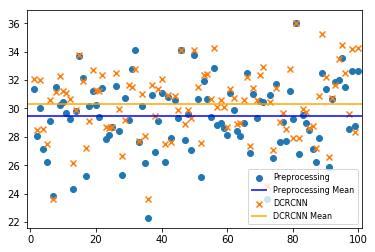

In [260]:
plt.scatter(np.arange(1, 101), np.array(psnr[2])[0:100], marker='o', label='Preprocessing')
plt.hlines(np.mean(np.array(psnr[2])[0:100]), xmin=-5, xmax=105, color='b', label='Preprocessing Mean')
plt.scatter(np.arange(1, 101), np.array(psnr[3])[0:100], marker='x', label='DCRCNN')
plt.hlines(np.mean(np.array(psnr[3])[0:100]), xmin=-5, xmax=105, color='orange', label='DCRCNN Mean')
plt.xlim(-1,101)
# plt.xlabel('Testing image ID')
# plt.ylabel('PSNR(dB)')
plt.legend(loc='best', prop={'size':8})
plt.show()

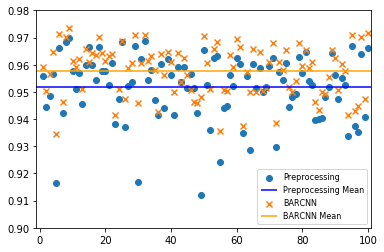

In [285]:
plt.scatter(np.arange(1, 101), np.array(ssim[2])[0:100], marker='o', label='Preprocessing')
plt.hlines(np.mean(np.array(ssim[2])[0:100]), xmin=-5, xmax=105, color='b', label='Preprocessing Mean')
plt.scatter(np.arange(1, 101), np.array(ssim[3])[0:100], marker='x', label='BARCNN')
plt.hlines(np.mean(np.array(ssim[3])[0:100]), xmin=-5, xmax=105, color='orange', label='BARCNN Mean')
plt.xlim(-1,101)
plt.ylim(0.90,0.98)
# plt.xlabel('Testing image ID')
# plt.ylabel('SSIM')
plt.legend(loc='lower right', prop={'size':8})
plt.show()

In [14]:
mse, psnr, ssim = get_evaluation()

NameError: name 'get_evaluation' is not defined

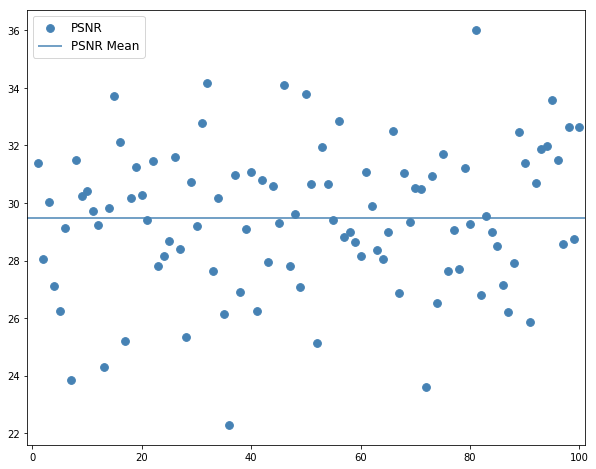

In [31]:
plt.figure(figsize=(10, 8))
plt.scatter(np.arange(1, 101), np.array(psnr[2])[0:100], color='steelblue', marker='o', s=60, label='PSNR')
plt.hlines(np.mean(np.array(psnr[2])[0:100]), xmin=-5, xmax=105, color='steelblue', label='PSNR Mean')
plt.xlim(-1,101)
# plt.xlabel('Testing image ID')
# plt.ylabel('PSNR(dB)')
plt.legend(loc='best', prop={'size':12})
plt.show()

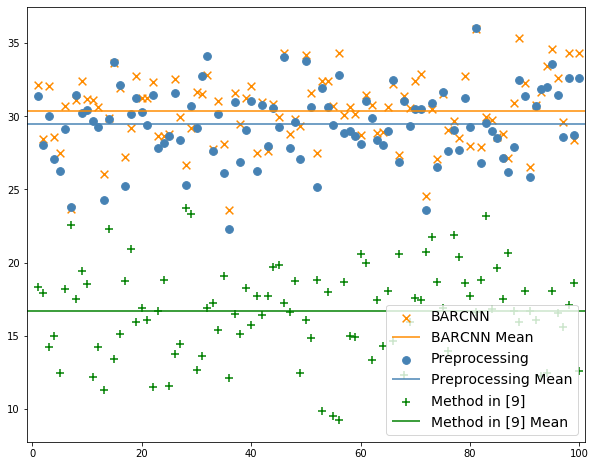

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(np.arange(1, 101), np.array(psnr[3])[0:100], color='darkorange', marker='x', s=60, label='BARCNN')
plt.hlines(np.mean(np.array(psnr[3])[0:100]), xmin=-5, xmax=105, color='darkorange', label='BARCNN Mean')
plt.scatter(np.arange(1, 101), np.array(psnr[2])[0:100], color='steelblue', marker='o', s=60, label='Preprocessing')
plt.hlines(np.mean(np.array(psnr[2])[0:100]), xmin=-5, xmax=105, color='steelblue', label='Preprocessing Mean')
plt.scatter(np.arange(1, 101), np.array(psnr[4])[0:100] + 0.1, color='green', marker='+', s=60, label='Method in [9]')
plt.hlines(np.mean(np.array(psnr[4])[0:100]) + 0.1, xmin=-5, xmax=105, color='green', label='Method in [9] Mean')
plt.xlim(-1,101)
# plt.xlabel('Testing image ID')
# plt.ylabel('PSNR(dB)')
plt.legend(loc='best', prop={'size':14})
plt.show()

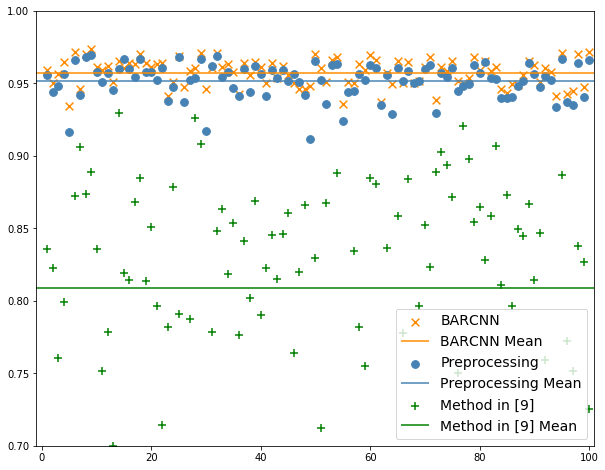

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(np.arange(1, 101), np.array(ssim[3])[0:100], color='darkorange', marker='x', s=60, label='BARCNN')
plt.hlines(np.mean(np.array(ssim[3])[0:100]), xmin=-5, xmax=105, color='darkorange', label='BARCNN Mean')
plt.scatter(np.arange(1, 101), np.array(ssim[2])[0:100], color='steelblue', marker='o', s=60, label='Preprocessing')
plt.hlines(np.mean(np.array(ssim[2])[0:100]), xmin=-5, xmax=105, color='steelblue', label='Preprocessing Mean')
plt.scatter(np.arange(1, 101), np.array(ssim[4])[0:100] + 0.1, color='green', marker='+', s=60, label='Method in [9]')
plt.hlines(np.mean(np.array(ssim[4])[0:100]) + 0.1, xmin=-5, xmax=105, color='green', label='Method in [9] Mean')
plt.xlim(-1,101)
plt.ylim(0.7, 1)
# plt.xlabel('Testing image ID')
# plt.ylabel('PSNR(dB)')
plt.legend(loc='best', prop={'size':14})
plt.show()

In [317]:
# Find best images
psnr_diff = np.zeros(1000)
for i in range(1000):
    psnr_diff[i] = psnr[3][i] - psnr[2][i]

ids = np.argsort(psnr_diff)
for j in np.arange(-1, -10, -1):
    print(ids[j] + 4001)

IndexError: list index out of range

In [318]:
np.array(ssim[2])[ids[-100:-1]]

IndexError: index 875 is out of bounds for axis 1 with size 100

In [102]:
eval_table(4795)

+--------------+--------------------+--------------------+--------------------+
|  Image4795   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.9533538818359375 | 40.38318662028456  | 0.9754475023747958 |
| Image_dcfree | 7123.814529418945  | 9.603677569125347  | 0.5753250528997531 |
|  Image_rec   | 139.21543884277344 | 26.693929601305733 | 0.9252109876199847 |
|  Image_out   | 57.133819580078125 | 30.561871018502274 | 0.9468263338048679 |
+--------------+--------------------+--------------------+--------------------+


In [108]:
eval_table(4419)

+--------------+--------------------+--------------------+---------------------+
|  Image4419   |        MSE         |        PSNR        |         SSIM        |
+--------------+--------------------+--------------------+---------------------+
|  Image_jpeg  | 4.911773681640625  | 41.218420131336195 |  0.976959682898764  |
| Image_dcfree | 7390.560317993164  | 9.444029950322538  | 0.39569323160926073 |
|  Image_rec   | 70.23080444335938  | 29.665527178921604 |  0.9402943395421467 |
|  Image_out   | 29.645401000976562 |  33.4112303162685  |  0.959225016878611  |
+--------------+--------------------+--------------------+---------------------+


In [253]:
eval_table(4151)

+--------------+--------------------+--------------------+--------------------+
|  Image4151   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.8140106201171875 | 40.48604540132146  | 0.9747231380719321 |
| Image_dcfree | 4550.890609741211  | 11.549839644203473 | 0.5907381675053366 |
|  Image_rec   | 126.06529235839844 | 27.12484825539821  | 0.9530156348064288 |
|  Image_out   | 61.752532958984375 | 30.22425584724893  | 0.959343266466931  |
+--------------+--------------------+--------------------+--------------------+


In [110]:
eval_table(4431)

+--------------+--------------------+--------------------+--------------------+
|  Image4431   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  | 5.3257904052734375 | 40.86696289944918  | 0.9781460816706601 |
| Image_dcfree | 3576.4757690429688 | 12.596250738631296 | 0.5744293123174574 |
|  Image_rec   | 73.91220092773438  | 29.443642261507527 | 0.9591912280550883 |
|  Image_out   | 35.45538330078125  | 32.633981760645774 | 0.965207138323437  |
+--------------+--------------------+--------------------+--------------------+


In [252]:
eval_table(4106)

+--------------+--------------------+--------------------+--------------------+
|  Image4106   |        MSE         |        PSNR        |        SSIM        |
+--------------+--------------------+--------------------+--------------------+
|  Image_jpeg  |  4.7647705078125   | 41.35038372911579  | 0.9802103481893171 |
| Image_dcfree | 6329.412216186523  | 10.117169799373357 | 0.5284885707186726 |
|  Image_rec   | 46.524627685546875 | 31.453974545032466 | 0.9669632036908334 |
|  Image_out   | 23.119735717773438 | 34.490974955211776 | 0.9698464428173482 |
+--------------+--------------------+--------------------+--------------------+


In [111]:
def save_image(image_id):
    output_dir = "../result_image"
    image_original = cv2.imread(os.path.join(original_dir, "{}.jpg".format(image_id)), 0)
    image_dcfree = cv2.imread(os.path.join(dcfree_dir, "{}.jpg".format(image_id)), 0)
    image_rec = cv2.imread(os.path.join(rec_dir, "{}_rec.jpg".format(image_id)), 0)
    image_out = cv2.imread(os.path.join(out_dir, "{}_out.jpg".format(image_id)), 0)
    cv2.imwrite(os.path.join(output_dir, "{}.jpg".format(image_id)), image_original)
    cv2.imwrite(os.path.join(output_dir, "{}_dcfree.jpg".format(image_id)), image_dcfree)
    cv2.imwrite(os.path.join(output_dir, "{}_rec.jpg".format(image_id)), image_rec)
    cv2.imwrite(os.path.join(output_dir, "{}_out.jpg".format(image_id)), image_out)

In [117]:
save_image(4151)

In [180]:
def get_ratio(image_original_dir, image_dcfree_dir):
    original_size = os.path.getsize(image_original_dir)
    dcfree_size = os.path.getsize(image_dcfree_dir)
    print(dcfree_size / original_size)
    
    return dcfree_size / original_size

In [182]:
image_ids = [4106, 4151, 4419, 4431]
for image_id in image_ids:
    image_original_dir = os.path.join(original_dir, "{}.jpg".format(image_id))
    image_dcfree_dir = os.path.join(dcfree_dir, "{}.jpg".format(image_id))
    get_ratio(image_original_dir, image_dcfree_dir)

0.635758746512127
0.6276188042922841
0.6313491788510844
0.642786201416937


# Image compression THE NEW TEST IMAGES

In [188]:
import glob
from dc_recovery_original import *

In [191]:
test_dir = "../gray8bit"
file_list = glob.glob(os.path.join(test_dir, "*.pgm"))
count = 10000
for file in file_list:
    image = read_image(file)
    dct = dct_transform(image, mode='compress', dc_free=False)
    image_rec = recover_from_dct(dct, mode='compress')
    cv2.imwrite("../new_test_images/{}.jpg".format(count), image_rec)
    dct_dcfree = dct_transform(image, mode='compress', dc_free=True)
    image_dcfree = recover_from_dct(dct_dcfree, mode='compress')
    cv2.imwrite("../new_test_images/{}_dcfree.jpg".format(count), image_dcfree)
    count += 1

In [194]:
image_ids = np.arange(10000, 10015, 1)
for image_id in image_ids:
    image_original_dir = os.path.join("../new_test_images", "{}.jpg".format(image_id))
    image_dcfree_dir = os.path.join("../new_test_images", "{}_dcfree.jpg".format(image_id))
    # print("{}.jpg".format(image_id))
    get_ratio(image_original_dir, image_dcfree_dir)

0.893629478535139
0.9147108805967415
0.9201831231481779
0.8551615645766701
0.95153651297438
0.9143462928106272
1.0548535900777132
0.9381277850128154
0.9312774824977363
0.9543313068540845
0.9692474851059674
0.9344475870573843
0.874564105479368
0.9320789800727034
0.9285363815990134


In [233]:
test_dir = "../testset/Urban100"
save_dir = "../testset/Urban100_ratio"
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
file_list = glob.glob(os.path.join(test_dir, "*.png"))
count = 1
for file in file_list:
    image = read_image(file)
    dct = dct_transform(image, mode='compress', dc_free=False)
    image_rec = recover_from_dct(dct, mode='compress')
    cv2.imwrite(os.path.join(save_dir, "{}.jpg".format(count)), image, [cv2.IMWRITE_JPEG_QUALITY, 95])
    dct_dcfree = dct_transform(image, mode='compress', dc_free=True)
    image_dcfree = recover_from_dct(dct_dcfree, mode='compress')
    cv2.imwrite(os.path.join(save_dir, "{}_dcfree.jpg".format(count)), image_dcfree, [cv2.IMWRITE_JPEG_QUALITY, 95])
    count += 1
    print(file)

../testset/Urban100/img_088.png
../testset/Urban100/img_077.png
../testset/Urban100/img_063.png
../testset/Urban100/img_062.png
../testset/Urban100/img_076.png
../testset/Urban100/img_089.png
../testset/Urban100/img_100.png
../testset/Urban100/img_048.png
../testset/Urban100/img_060.png
../testset/Urban100/img_074.png
../testset/Urban100/img_075.png
../testset/Urban100/img_061.png
../testset/Urban100/img_049.png
../testset/Urban100/img_065.png
../testset/Urban100/img_071.png
../testset/Urban100/img_059.png
../testset/Urban100/img_058.png
../testset/Urban100/img_070.png
../testset/Urban100/img_064.png
../testset/Urban100/img_099.png
../testset/Urban100/img_072.png
../testset/Urban100/img_066.png
../testset/Urban100/img_067.png
../testset/Urban100/img_073.png
../testset/Urban100/img_098.png
../testset/Urban100/img_028.png
../testset/Urban100/img_014.png
../testset/Urban100/img_001.png
../testset/Urban100/img_015.png
../testset/Urban100/img_029.png
../testset/Urban100/img_003.png
../tests

In [250]:
image_ids = np.arange(1, 101, 1)
ratios = []
for image_id in image_ids:
    image_original_dir = os.path.join("../testset/LFW100", "{}.jpg".format(image_id))
    image_dcfree_dir = os.path.join("../testset/LFW100_dcfree", "{}.jpg".format(image_id))
    # print("{}.jpg".format(image_id))
    ratio = get_ratio(image_original_dir, image_dcfree_dir)
    ratios.append(ratio)

0.6196498804657978
0.6210296499753504
0.6591831557584982
0.6324345245774738
0.6829389650597081
0.6615338345864662
0.6431508458646616
0.5643499709808474
0.6117828450864238
0.6414332733031112
0.6780144426239456
0.6898192197906755
0.6839276485788114
0.6434707903780069
0.6417276210379659
0.6174626590448091
0.6320872089578766
0.6061133388817432
0.6583611756045076
0.6580455939208105
0.6449921658430758
0.6106624740941899
0.6522621096631424
0.6179273377010125
0.6591576332429991
0.6786431255469192
0.5889159112683322
0.6107836716874046
0.6270939042190867
0.6192045861698317
0.6355451580887566
0.649844816883923
0.6663686865461975
0.6351451127392514
0.6507847183142625
0.6186815429621063
0.6833004465676602
0.6644807507490531
0.6396594159515732
0.6492024380754766
0.6408576998050682
0.6856114753290284
0.619338629727711
0.6097916488039098
0.6374163664436439
0.6603944171328474
0.6586184559213238
0.5946110519104887
0.6762820512820513
0.6382612152938838
0.6463620981387479
0.6549811708319069
0.665695917358

In [251]:
print(np.min(np.array(ratios)), np.mean(np.array(ratios)), np.max(np.array(ratios)))

0.5493454179254783 0.6383649815103998 0.7037361098958789


In [237]:
Set5 = [0.4741169874789759, 0.6190203653101316, 0.7104402442907175]
Set14 = [0.43482653765070484, 0.6436626261810846, 0.8094334299417785]

BSDS100 = [0.4419111883583819, 0.6393513792764423, 0.7425188928663344]

General100 = [0.4259085975221769, 0.6359251794091239, 0.7805434496475474]

Urban100 = [0.46330304663637994, 0.6649740551772078, 0.818207903945696]

Manga109 = [0.49539759318895943, 0.6637787115428591, 0.8113422750963718]

LFW100 = [0.5493454179254783, 0.6383649815103998, 0.7037361098958789]

In [241]:
min_ratio = [Set5[0], Set14[0], BSDS100[0], General100[0], Urban100[0], Manga109[0]]
mean_ratio = [Set5[1], Set14[1], BSDS100[1], General100[1], Urban100[1], Manga109[1]]
max_ratio = [Set5[2], Set14[2], BSDS100[2], General100[2], Urban100[2], Manga109[2]]

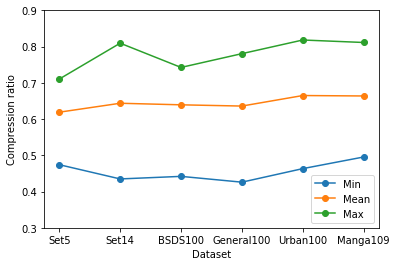

In [248]:
label = ["Set5", "Set14", "BSDS100", "General100", "Urban100", "Manga109"]
plt.plot(label, min_ratio, label='Min', marker='o')
plt.plot(label, mean_ratio, label='Mean', marker='o')
plt.plot(label, max_ratio, label='Max', marker='o')
plt.ylim(0.3, 0.9)
plt.xlabel('Dataset')
plt.ylabel('Compression ratio')
plt.legend(loc='best')
plt.show()
plt.show()

In [200]:
test_dir = "../test_image_3"
file_list = glob.glob(os.path.join(test_dir, "*.jpg"))
count = 10000
for file in file_list:
    image = read_image(file)
    dct = dct_transform(image, mode='compress', dc_free=False)
    image_rec = recover_from_dct(dct, mode='compress')
    cv2.imwrite("../test_image_3/{}.jpg".format(count), image_rec)
    dct_dcfree = dct_transform(image, mode='compress', dc_free=True)
    image_dcfree = recover_from_dct(dct_dcfree, mode='compress')
    cv2.imwrite("../test_image_3/{}_dcfree.jpg".format(count), image_dcfree)
    count += 1
    print(file)

../test_image_3/1600_1067.jpg
../test_image_3/2048_1365.jpg
../test_image_3/1024_683.jpg


In [201]:
image_ids = np.arange(10000, 10009, 1)
for image_id in image_ids:
    image_original_dir = os.path.join("../test_image_3", "{}.jpg".format(image_id))
    image_dcfree_dir = os.path.join("../test_image_3", "{}_dcfree.jpg".format(image_id))
    # print("{}.jpg".format(image_id))
    get_ratio(image_original_dir, image_dcfree_dir)

0.9546302952341317
0.9521879040250583
0.9543156684264369


FileNotFoundError: [Errno 2] No such file or directory: '../test_image_3/10003.jpg'

# DC replacement

In [173]:
out_dir = "../image_dcreplace"

In [174]:
mse, psnr, ssim = get_evaluation()

In [175]:
table = PrettyTable(['Average', 'MSE', 'PSNR','SSIM'])
table.add_row(['Image_jpeg', np.mean(mse[0]), np.mean(psnr[0]), np.mean(ssim[0])])
table.add_row(['Image_dcfree', np.mean(mse[1]), np.mean(psnr[1]), np.mean(ssim[1])])
table.add_row(['Image_rec', np.mean(mse[2]), np.mean(psnr[2]), np.mean(ssim[2])])
table.add_row(['Image_out', np.mean(mse[3]), np.mean(psnr[3]), np.mean(ssim[3])])
print(table)

+--------------+-------------------+-------------------+--------------------+
|   Average    |        MSE        |        PSNR       |        SSIM        |
+--------------+-------------------+-------------------+--------------------+
|  Image_jpeg  | 6.411186492919922 | 40.28119640479506 | 0.9744197086708256 |
| Image_dcfree | 4232.143029449463 | 12.20243501245282 | 0.5695236476935088 |
|  Image_rec   | 87.95627461242675 | 29.52993205900049 | 0.9508264113224968 |
|  Image_out   | 73.17479483032227 | 30.37442276834522 | 0.9525695211721945 |
+--------------+-------------------+-------------------+--------------------+


In [178]:
fsize = os.path.getsize("../result_image/4106.jpg")